In [1]:
# 案例

In [2]:
## 柱形图几坐标轴设置

In [9]:
# 创建数据集
import pandas as pd
import numpy as np
from plotnine import *

df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],     
    'category': ['Female', 'Male', '1-24', '25-54', '55+', ' Lo', 'Lo-Med', 'Med', 'High'],     
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df


,variable,category,value
0,gender,Female,60
1,gender,Male,40
2,age,1-24,50
3,age,25-54,30
4,age,55+,20
5,income,Lo,10
6,income,Lo-Med,25
7,income,Med,25
8,income,High,40


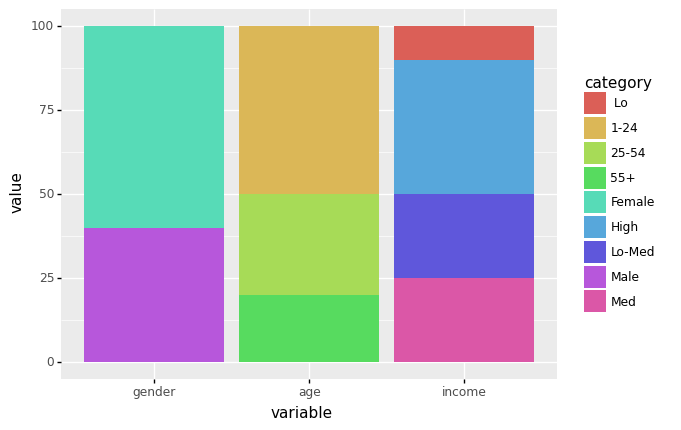

<ggplot: (335229690)>

In [10]:
import plotnine as pn
(pn.ggplot(df, pn.aes(
        x='variable', y='value', fill='category')
    )  
    + pn.geom_col()
)

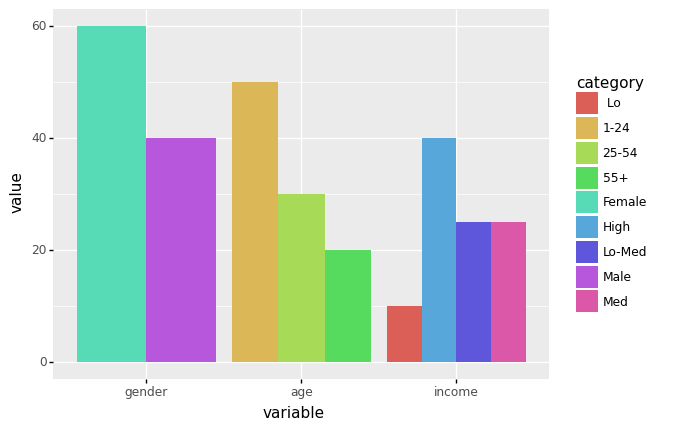

<ggplot: (335353354)>

In [11]:
(pn.ggplot(df, pn.aes(
        x='variable', y='value', fill='category'))  
    + pn.geom_col(
        stat='identity', position='dodge')
)

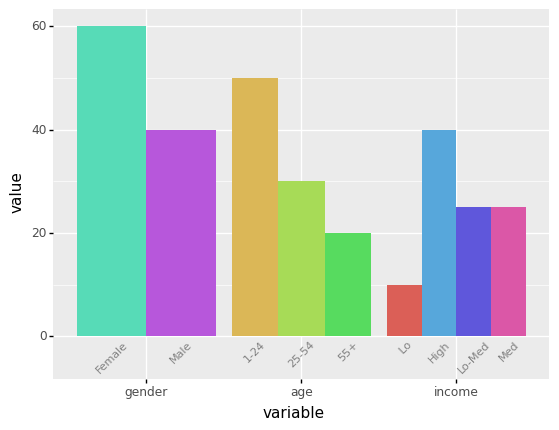

<ggplot: (335473541)>

In [15]:
# 设置各数据的显示距离
dodge_text = position_dodge(width=0.9)

(ggplot(df, aes(
        x='variable', y='value', fill='category'))  
    + geom_bar( # 修改了类名称, 这里使用了 geom_bar,它与 geom_col 没有什么区别
        stat='identity',
        position='dodge',
        show_legend=False # 这个参数用于将图例关闭
    )
    + geom_text(  # 展示 category 特征的值——对应相应的柱子。
        aes(y=-0.5, label='category'), 
            position=dodge_text,
            color='gray',
            size=8,
            angle=45,
            va='top'

    )
    # 扩展 Y 轴的范围,默认是从 0 开始
    + lims(y=(-5, 60)) # 5
)



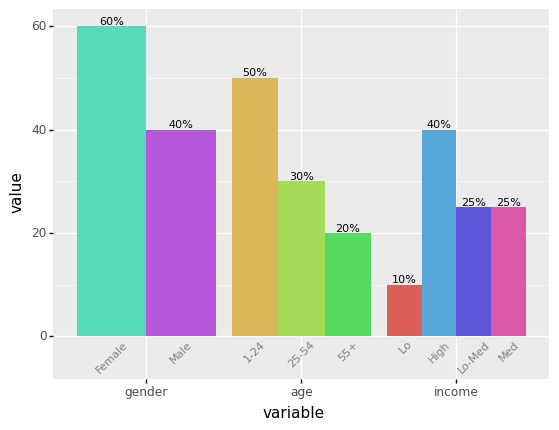

<ggplot: (335512583)>

In [16]:
# 增加文本对象,标示数值
dodge_text = position_dodge(width=0.9)

(ggplot(df, aes(
        x='variable', y='value', fill='category'))  
    + geom_bar( 
        stat='identity',
        position='dodge',
        show_legend=False 
    )
    + geom_text(  
        aes(y=-0.5, label='category'), 
            position=dodge_text,
            color='gray',
            size=8,
            angle=45,
            va='top'

    )
    + geom_text(
        aes(label='value'),
        position=dodge_text,
        size=8,
        va='bottom',
        format_string='{}%'
    )
    + lims(y=(-5, 60)) 
)



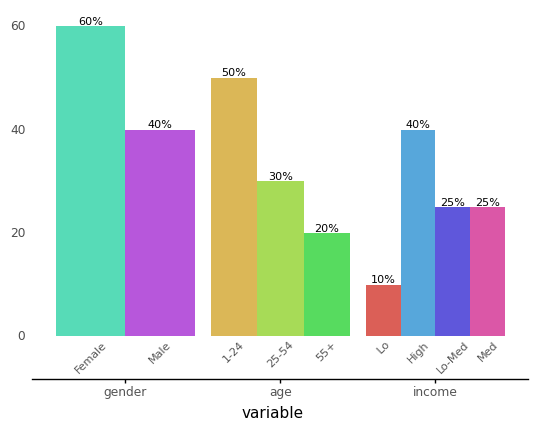

<ggplot: (345563224)>

In [18]:
# 增加文本对象,标示数值
dodge_text = position_dodge(width=0.9)
ccolor='#555555'

(ggplot(df, aes(
        x='variable', y='value', fill='category'))  
    + geom_bar( 
        stat='identity',
        position='dodge',
        show_legend=False 
    )
    + geom_text(  
        aes(y=-0.5, label='category'), 
            position=dodge_text,
            color=ccolor,
            size=8,
            angle=45,
            va='top'

    )
    + geom_text(
        aes(label='value'),
        position=dodge_text,
        size=8,
        va='bottom',
        format_string='{}%'
    )
    + lims(y=(-5, 60)) 
    + theme(panel_background=element_rect(fill='white'),
        axis_title_y=element_blank(),
        axis_line_x=element_line(color='black'),
        axis_line_y=element_blank(),
        axis_text_x=element_text(color=ccolor),
        axis_ticks_major_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank()
    )
)



In [19]:
# 元素周期表

In [59]:
import pandas as pd
import numpy as np
from plotnine import *
elements = pd.read_csv('~/data/cbcpv/elemanets/elements.csv')
elements.sample(5)

,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,IE-1,EA,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period
19,20,Ca,Calcium,40.078,#3DFF00,[Ar] 4s2,1.00,174.0,100 (+2),NaN,590.0,-2.0,solid,metallic,1115.0,1757.0,1.55,alkaline earth metal,Ancient,2,4
21,22,Ti,Titanium,47.867,#BFC2C7,[Ar] 3d2 4s2,1.54,136.0,86 (+2),NaN,659.0,-8.0,solid,metallic,1941.0,3560.0,4.51,transition metal,1791,4,4
31,32,Ge,Germanium,72.64,#668F8F,[Ar] 3d10 4s2 4p2,2.01,122.0,73 (+2),NaN,762.0,-119.0,solid,metallic,1211.0,3093.0,5.32,metalloid,1886,14,4
40,41,Nb,Niobium,92.90638,#73C2C9,[Kr] 4d4 5s1,1.60,137.0,72 (+3),NaN,652.0,-86.0,solid,metallic,2750.0,5017.0,8.57,transition metal,1801,5,5
39,40,Zr,Zirconium,91.224,#94E0E0,[Kr] 4d2 5s2,1.33,148.0,72 (+4),NaN,640.0,-41.0,solid,metallic,2128.0,4682.0,6.51,transition metal,1789,4,5


In [60]:
elements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   atomic number             118 non-null    int64  
 1   symbol                    118 non-null    object 
 2   name                      118 non-null    object 
 3   atomic mass               118 non-null    object 
 4   CPK                       118 non-null    object 
 5   electronic configuration  118 non-null    object 
 6   electronegativity         97 non-null     float64
 7   atomic radius             71 non-null     float64
 8   ion radius                92 non-null     object 
 9   van der Waals radius      38 non-null     float64
 10  IE-1                      102 non-null    float64
 11  EA                        85 non-null     float64
 12  standard state            99 non-null     object 
 13  bonding type              98 non-null     object 
 14  melting po

In [61]:
## 清洗数据

In [62]:
# 更改特征group
elements['group'] = [-1 if g=='-' else int(g) for g in elements.group]

In [63]:
# 类型上进行转换
elements['bonding type'] = elements['bonding type'].astype('category')
elements['metal'] = elements['metal'].astype('category')

In [64]:
# 为了显示方便,将原本是整数型的 atomic number 特征,转化为字符串类型。
elements['atomic_number'] = elements['atomic number'].astype(str)

In [65]:
# 引用两部分元素集合
top = elements.query('group != -1').copy()
bottom = elements.query('group == -1').copy()

In [66]:
# 创建两个特征
top['x'] = top.group
top['y'] = top.period

In [67]:
# 锕系和镧系元素也要做类似的配置
nrows = 2
hshift = 3.5
vshift = 3
bottom['x'] = np.tile(np.arange(
        len(bottom) // nrows
    ),
    nrows
) + hshift
bottom['y']  = bottom.period + vshift

In [68]:
# 设置小矩形的大小
tile_width = .95
tile_height = .95

In [76]:
# 绘制 4 个图层
def inner_text(data):
    layers = [geom_text(data, aes(label='atomic_number'),
                        nudge_x=-0.40, nudge_y=0.40,
                        ha='left', va='top', fontweight='normal', size=6),
              geom_text(data, aes(label='symbol'),
                        nudge_y=.1, size=9),
              geom_text(data, aes(label='name'),
                        nudge_y=-0.125, fontweight='normal', size=4.5),
              geom_text(data, aes(label='atomic mass'),
                        nudge_y=-.3, fontweight='normal', size=4.5)]
    return layers

In [88]:
# 处理Lu和Lr图层
split_df = pd.DataFrame({
    'x': 3-tile_width/4,
    'y': [6,7],
    'metal': pd.Categorical(['lanthanoid', 'actinoid'])
})
split_df

,x,y,metal
0,2.7625,6,lanthanoid
1,2.7625,7,actinoid


In [87]:
# 我们就可以创建每列(即:族,编号为 1~18)及其对应的 Y 轴坐标
groupdf=pd.DataFrame({
    'group': range(1, 19),
    'y': np.repeat([1,2,4,2,1], [1,1,10,5,1])
})
groupdf

,group,y
0,1,1
1,2,2
2,3,4
3,4,4
4,5,4
5,6,4
6,7,4
7,8,4
8,9,4
9,10,4


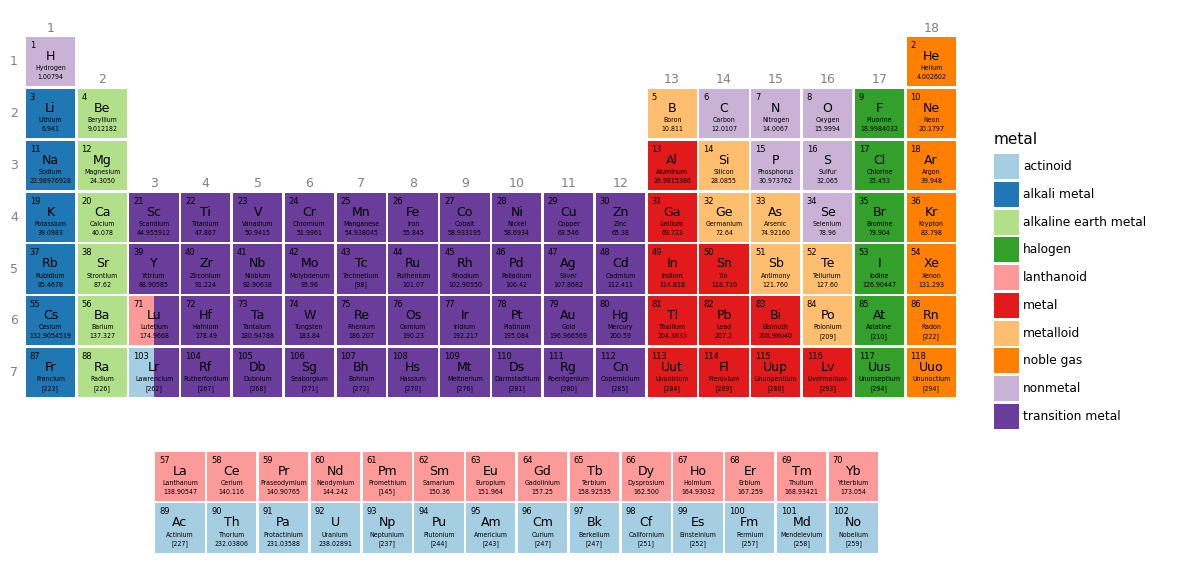

<ggplot: (345517764)>

In [93]:
# 开始画图
(ggplot(aes('x', 'y'))
    # 4 元素块上色 
    + aes(fill='metal')
    # 1
    + geom_tile(top, aes(width=tile_width, height=tile_height))
    # 添加Lu和Lr图层
    + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))
    # 2
    + geom_tile(bottom, aes(width=tile_width, height=tile_height))
    # 利用函数添加图层
    + inner_text(top)
    + inner_text(bottom)
    # 15 标注每一列族序号的文本图层
    + geom_text(groupdf, 
            aes('group', 'y', label='group'),
            color='gray', nudge_y=.525,
            va='bottom', fontweight='normal', size=9,
            inherit_aes=False
    ) 
    # 3 实现坐标轴反转
    + scale_y_reverse(breaks=range(1,8), limits=(0, 10.5)) # 18 增加了纵坐标主刻度标示数字
    # 对元素块的填充色进行转换。
    + scale_fill_brewer(type='qual', palette=3)
    # 调整大小
    + coord_equal(expand=False)
    # 增加了一个经典的主题图层对象。
    + theme_void()
    # 增加一个主题图层,并且设置了该图层的尺寸和背景色 plot_background=element_rect(fill='white')
    + theme(figure_size=(12, 6),
            plot_background=element_rect(fill='white'),
            axis_text_y=element_text(margin={'r':5}, color='gray', size=9) # 19 标注周期, 增加了参数 axis_text_y,对 Y 轴标示的显示格式进行了设置。

    )
)